In [41]:
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
num_iterations = 1000
num_neurons = 2

In [79]:
ve = -60.
def fIl(v):
    return 0.1*(ve-v)

Phi = 4.
G_K = 18.
E_K = -80.
G_Na = 45.
E_Na = 55.

def fINaK(v, h, n):    
    Alpha1 = -0.1*(v+33)/(math.exp(-0.1*(v+33)) - 1)
    Beta1 = 4*(math.exp(-1*(v +58)/12))
    m_inf = Alpha1/(Alpha1 + Beta1)
    
    Alpha2 = 0.07*math.exp(-1*(v+50)/10)
    Beta2 = 1/(math.exp(-0.1*(v+20)) + 1)
    tau_h = 1/(Alpha2 + Beta2)
    h_inf = Alpha2/(Alpha2 + Beta2)
    
    Alpha3 = -0.01*(v+34)/(math.exp(-0.1*(v+34)) - 1);
    Beta3 = 0.125*math.exp(-1*(v+44)/25);
    tau_n = 1/(Alpha3 + Beta3);
    n_inf = Alpha3/(Alpha3 + Beta3);

    fn = Phi*(n_inf - n)/tau_n
    fh = Phi*(h_inf - h)/tau_h
    
    INa = G_Na*m_inf*m_inf*m_inf*h*(v - E_Na);
    Ik = G_K*n*n*n*n*(v - E_K);
    
    return INa, Ik, fn, fh

In [80]:
def call_currents(v, h, n):    
    Il = fIl(v)
    INa, Ik, fn, fh = fINaK(v, h, n)
    dv = INa + Ik + Il
    return dv, fn, fh

In [81]:
h_cons = 0.001

def neuron_combined_steps(x):
    v, h, n = x
    v_1, h_1, n_1 = call_currents(v, h, n)
    
    v_2, h_2, n_2 = call_currents(h_cons/2*v_1 + v, h_cons/2*h_1 + h, h_cons/2*n_1 + n)
    
    v_3, h_3, n_3 = call_currents(h_cons/2*v_2 + v, h_cons/2*h_2 + h, h_cons/2*n_2 + n)
    
    v_4, h_4, n_4 = call_currents(h_cons*v_3 + v, h_cons*h_3 + h, h_cons*n_3 + n)
        
    v_next = 1/6*(v_1+2*v_2+2*v_3+v_4) + v
    h_next = 1/6*(h_1+2*h_2+2*h_3+h_4) + h
    n_next = 1/6*(n_1+2*n_2+2*n_3+n_4) + n
    
    return [v_next, h_next, n_next]

In [82]:
current_values = [-40., -40., -40.]
all_values = []
all_values.append(current_values)
for i in range(num_iterations):
    next_values = neuron_combined_steps(current_values)
    all_values.append(next_values)
    current_values = next_values

ZeroDivisionError: float division by zero

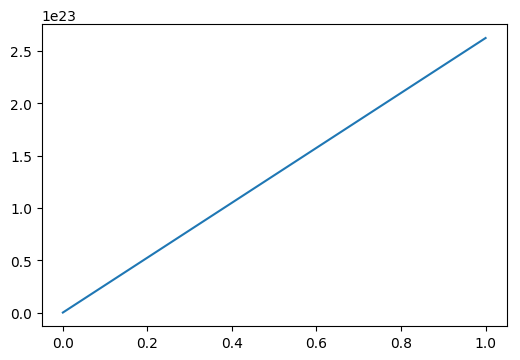

In [83]:
plt.plot([x[0] for x in all_values])